In [33]:
# Import Libraries and Dependencies 
import pandas as pd
import numpy as np 
import os
import json
from pathlib import Path
from datetime import datetime, timedelta
from tiingo import TiingoClient
import hvplot.pandas
%matplotlib inline

In [34]:
# Bring Env Variables into Python/Store in Variable
tiingo = os.getenv('TIINGO_API_KEY')

In [35]:
# Create a Client to Connect to Tiingo
client = TiingoClient()

In [36]:
# Create Start and End Dates for 1 Year's Worth of Historical Data
end = datetime.now()
start = end + timedelta(-365)

# DataFrames for Stock Tickers

In [37]:
# Create DataFrames for China
china_ticker_df = client.get_dataframe(['ASHR','CQQQ', 'CHIE', 'CHIM', 'KURE', 'CHIS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')
china_ticker_df.head()

C:\Users\selva\Anaconda3\lib\site-packages\tiingo\api.py:270: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  prices = pd.concat([prices, df[stock]], axis=1)


,ASHR,CQQQ,CHIE,CHIM,KURE,CHIS
date,,,,,,
2019-02-06 00:00:00+00:00,24.17,45.23,11.625,15.980,19.2012,16.2400
2019-02-07 00:00:00+00:00,23.95,44.08,11.460,15.811,19.0900,16.1470
2019-02-08 00:00:00+00:00,23.81,44.66,11.390,15.950,18.8522,16.0625
2019-02-11 00:00:00+00:00,24.45,45.21,11.495,16.005,19.3500,16.3634
2019-02-12 00:00:00+00:00,24.66,45.90,11.490,15.990,19.8750,16.4648


In [38]:
china_df = china_ticker_df.rename(columns={'CQQQ':'CQQQ (Technology)', 'CHIE':'CHIE (Energy)', 'CHIM':'CHIM (Materials)', 'KURE':'KURE (Healthcare)', 'CHIS':'CHIS (Consumer Staples)'})
china_df.head()

,ASHR,CQQQ (Technology),CHIE (Energy),CHIM (Materials),KURE (Healthcare),CHIS (Consumer Staples)
date,,,,,,
2019-02-06 00:00:00+00:00,24.17,45.23,11.625,15.980,19.2012,16.2400
2019-02-07 00:00:00+00:00,23.95,44.08,11.460,15.811,19.0900,16.1470
2019-02-08 00:00:00+00:00,23.81,44.66,11.390,15.950,18.8522,16.0625
2019-02-11 00:00:00+00:00,24.45,45.21,11.495,16.005,19.3500,16.3634
2019-02-12 00:00:00+00:00,24.66,45.90,11.490,15.990,19.8750,16.4648


In [39]:
# Create DataFrames for China
us_ticker_df = client.get_dataframe(['SPY','IGM', 'IYE', 'IYM', 'IYH', 'IECS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')
us_ticker_df.head()

,SPY,IGM,IYE,IYM,IYH,IECS
2019-02-06 00:00:00+00:00,272.74,193.7109,35.16,89.50,191.0895,24.5705
2019-02-07 00:00:00+00:00,270.14,190.7848,34.36,87.83,189.0200,24.5157
2019-02-08 00:00:00+00:00,270.47,191.5262,34.20,87.58,189.2100,24.6313
2019-02-11 00:00:00+00:00,270.62,191.8665,34.39,87.92,189.1700,24.7325
2019-02-12 00:00:00+00:00,274.10,194.7900,34.83,89.89,191.6600,24.9152


In [40]:
us_df = us_ticker_df.rename(columns={'IGM':'IGM (Technology)', 'IYE':'IYE (Energy)', 'IYM':'IYM (Materials)', 'IYH':'IYH (Healthcare)', 'IECS':'IECS (Consumer Staples)'})
us_df.head()

,SPY,IGM (Technology),IYE (Energy),IYM (Materials),IYH (Healthcare),IECS (Consumer Staples)
2019-02-06 00:00:00+00:00,272.74,193.7109,35.16,89.50,191.0895,24.5705
2019-02-07 00:00:00+00:00,270.14,190.7848,34.36,87.83,189.0200,24.5157
2019-02-08 00:00:00+00:00,270.47,191.5262,34.20,87.58,189.2100,24.6313
2019-02-11 00:00:00+00:00,270.62,191.8665,34.39,87.92,189.1700,24.7325
2019-02-12 00:00:00+00:00,274.10,194.7900,34.83,89.89,191.6600,24.9152


# Daily Returns for Stocks

In [41]:
# Calculate the Daily ROI for China Stocks
china_daily_returns = china_df.pct_change()
china_daily_returns.head()

,ASHR,CQQQ (Technology),CHIE (Energy),CHIM (Materials),KURE (Healthcare),CHIS (Consumer Staples)
date,,,,,,
2019-02-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-07 00:00:00+00:00,-0.009102,-0.025426,-0.014194,-0.010576,-0.005791,-0.005727
2019-02-08 00:00:00+00:00,-0.005846,0.013158,-0.006108,0.008791,-0.012457,-0.005233
2019-02-11 00:00:00+00:00,0.026879,0.012315,0.009219,0.003448,0.026405,0.018733
2019-02-12 00:00:00+00:00,0.008589,0.015262,-0.000435,-0.000937,0.027132,0.006197


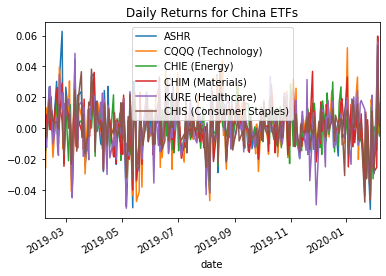

In [42]:
# Plot Daily ROIs for China
china_daily_returns.plot(title="Daily Returns for China ETFs")

In [43]:
# Calculate the Daily ROI for US Stocks
us_daily_returns = us_df.pct_change()
us_daily_returns.head()

,SPY,IGM (Technology),IYE (Energy),IYM (Materials),IYH (Healthcare),IECS (Consumer Staples)
2019-02-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-07 00:00:00+00:00,-0.009533,-0.015106,-0.022753,-0.018659,-0.010830,-0.002230
2019-02-08 00:00:00+00:00,0.001222,0.003886,-0.004657,-0.002846,0.001005,0.004715
2019-02-11 00:00:00+00:00,0.000555,0.001777,0.005556,0.003882,-0.000211,0.004109
2019-02-12 00:00:00+00:00,0.012859,0.015237,0.012794,0.022407,0.013163,0.007387


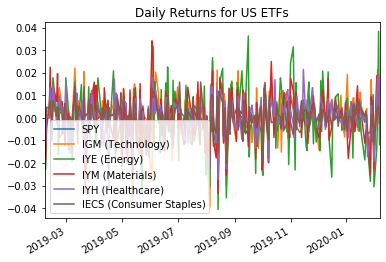

In [44]:
# Plot Daily ROIs for US
us_daily_returns.plot(title="Daily Returns for US ETFs")

In [45]:
# Plot China Daily ROIs and US Daily ROIs
###china_roi_plot= china_daily_returns.hvplot.bar(label= '2019 - current')
###us_roi_plot = us_daily_returns.hvplot.bar(label= '2019 - current' )

###combined_plot = china_roi_plot * us_roi_plot
###combined_plot

# Daily Standard Deviations for Portfolios

In [46]:
# Calculate the Standard Deviation for China Portfolio
china_std = china_daily_returns.std()
china_std

ASHR                       0.015911
CQQQ (Technology)          0.016277
CHIE (Energy)              0.012723
CHIM (Materials)           0.014409
KURE (Healthcare)          0.016355
CHIS (Consumer Staples)    0.013404
dtype: float64

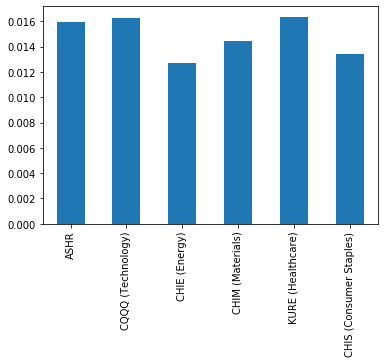

In [47]:
# Plot Standard Deviation for China
china_std.plot.bar()

In [48]:
# Calculate the Standard Deviation for Portfolio 
us_std = us_daily_returns.std()
us_std

SPY                        0.007570
IGM (Technology)           0.010367
IYE (Energy)               0.012605
IYM (Materials)            0.010338
IYH (Healthcare)           0.008363
IECS (Consumer Staples)    0.006276
dtype: float64

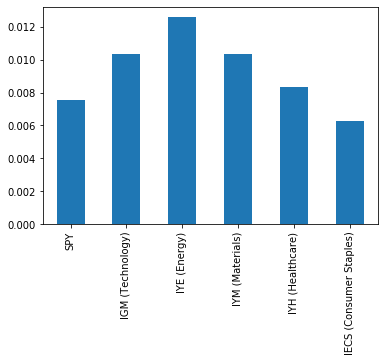

In [49]:
# Plot Standard Deviation for US
us_std.plot.bar()

In [50]:
# Annualized Standard Deviation (252 Trading Days) for China Portfolio
annualized_china_std = china_std * np.sqrt(252)
annualized_china_std

ASHR                       0.252576
CQQQ (Technology)          0.258388
CHIE (Energy)              0.201978
CHIM (Materials)           0.228743
KURE (Healthcare)          0.259630
CHIS (Consumer Staples)    0.212774
dtype: float64

In [51]:
# Annualized Standard Deviation (252 Trading Days) for US Portfolio
annualized_us_std = us_std * np.sqrt(252)
annualized_us_std

SPY                        0.120167
IGM (Technology)           0.164578
IYE (Energy)               0.200095
IYM (Materials)            0.164113
IYH (Healthcare)           0.132753
IECS (Consumer Staples)    0.099634
dtype: float64

# Rolling Statistics

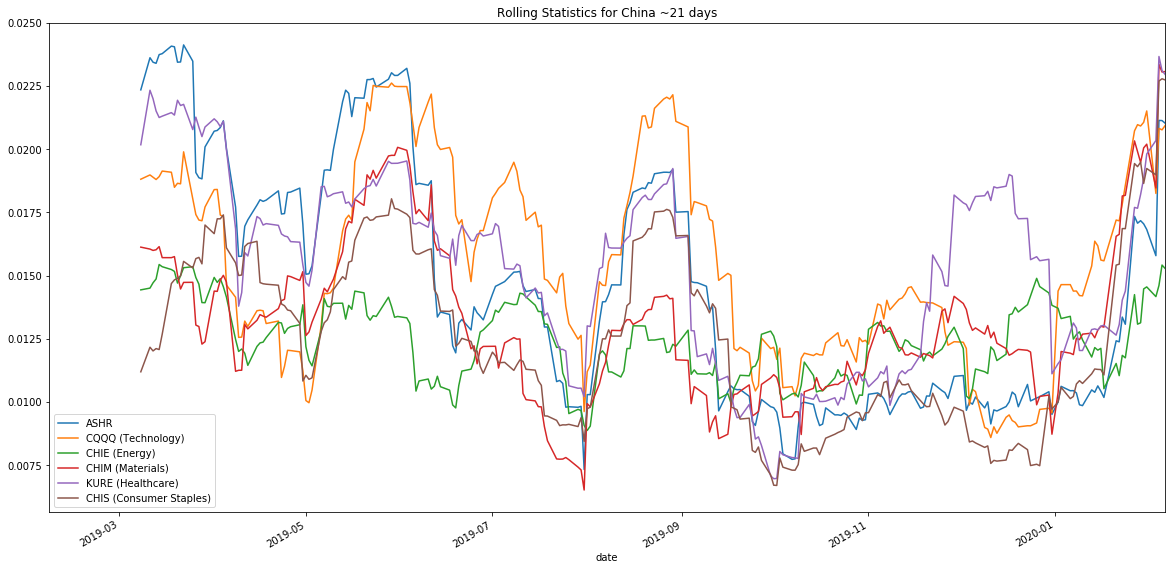

In [52]:
# Calculate and Plot the Rolling Standard Deviation for China (using a 21 day window)
china_daily_returns.rolling(window=21).std().plot(figsize=(20,10), title='Rolling Statistics for China ~21 days')

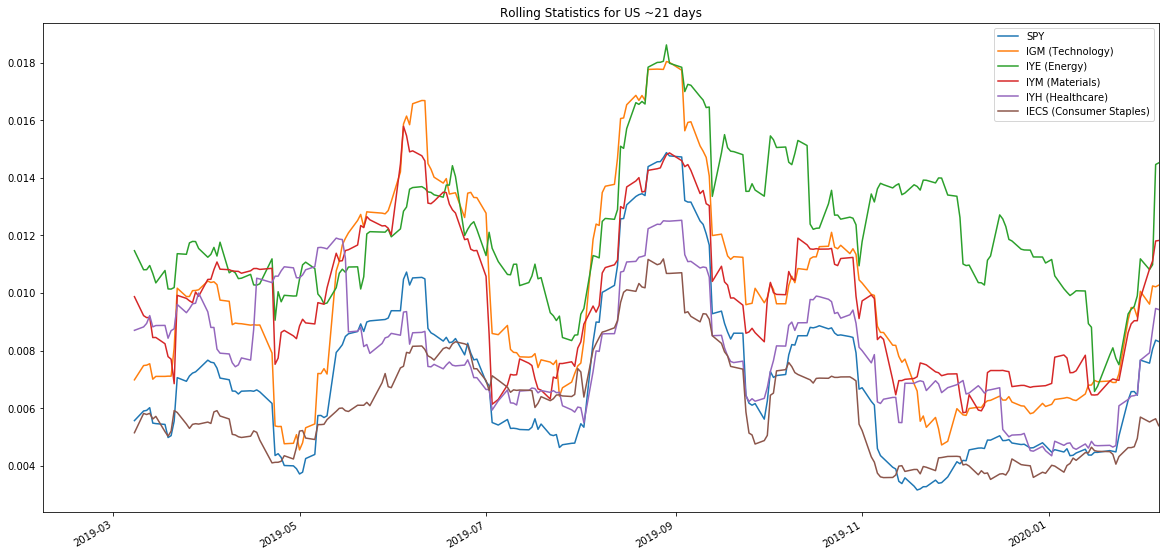

In [53]:
# Calculate and Plot the Rolling Standard Deviation for US (using a 21 day window)
us_daily_returns.rolling(window=21).std().plot(figsize=(20,10), title='Rolling Statistics for US ~21 days')

# Correlation/Beta

In [54]:
# China's Correlation 
china_correlation = china_daily_returns.corr()
china_correlation

# If we need the heatmap:
## import seaborn as sns
## sns.heatmap(china_correlation, vmin=-1, vmax=1, annot=True)

,ASHR,CQQQ (Technology),CHIE (Energy),CHIM (Materials),KURE (Healthcare),CHIS (Consumer Staples)
ASHR,1.000000,0.796713,0.561759,0.784095,0.716195,0.754543
CQQQ (Technology),0.796713,1.000000,0.517967,0.676920,0.661340,0.715794
CHIE (Energy),0.561759,0.517967,1.000000,0.553204,0.435604,0.486905
CHIM (Materials),0.784095,0.676920,0.553204,1.000000,0.556989,0.629752
KURE (Healthcare),0.716195,0.661340,0.435604,0.556989,1.000000,0.654499
CHIS (Consumer Staples),0.754543,0.715794,0.486905,0.629752,0.654499,1.000000


In [55]:
# Calculate Beta for China Portfolio 
china_covariance = china_daily_returns['CQQQ (Technology)'].cov(china_daily_returns['ASHR'])
china_variance = china_daily_returns['ASHR'].var()
china_beta = china_covariance / china_variance
china_beta

0.8150453663980218

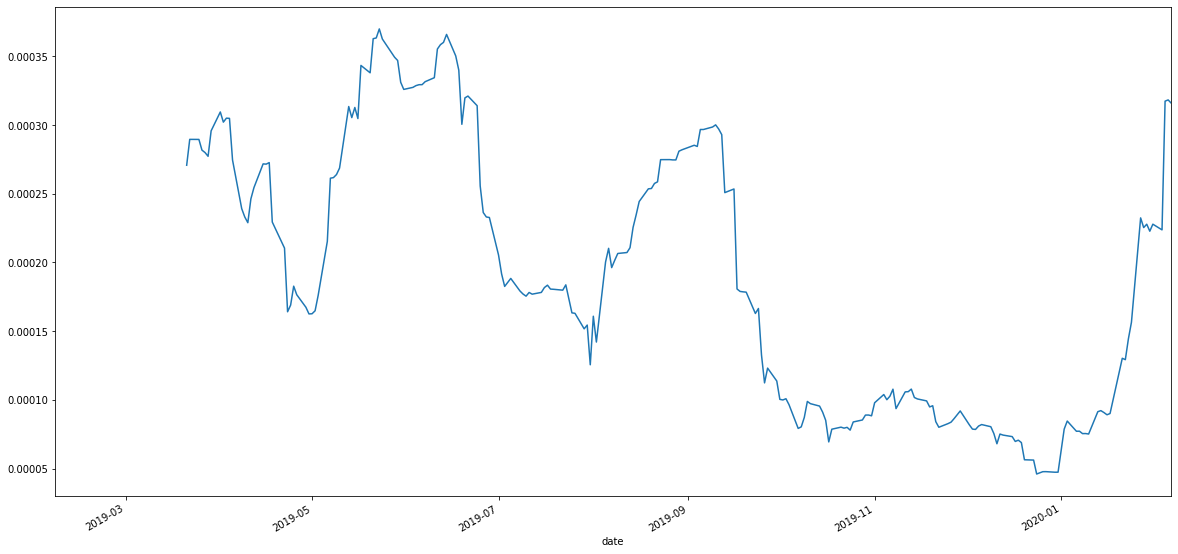

In [56]:
rolling_china_covariance = china_daily_returns['CQQQ (Technology)'].rolling(window=30).cov(china_daily_returns['ASHR'])
rolling_china_covariance.plot(figsize=(20, 10))

In [57]:
# US's Correlation 
us_correlation = us_daily_returns.corr()
us_correlation

# If we need the heatmap:
## import seaborn as sns
## sns.heatmap(us_correlation, vmin=-1, vmax=1, annot=True)

,SPY,IGM (Technology),IYE (Energy),IYM (Materials),IYH (Healthcare),IECS (Consumer Staples)
SPY,1.000000,0.924520,0.657410,0.788898,0.772897,0.645065
IGM (Technology),0.924520,1.000000,0.538920,0.660312,0.663561,0.508632
IYE (Energy),0.657410,0.538920,1.000000,0.631769,0.462677,0.309881
IYM (Materials),0.788898,0.660312,0.631769,1.000000,0.564172,0.491654
IYH (Healthcare),0.772897,0.663561,0.462677,0.564172,1.000000,0.547803
IECS (Consumer Staples),0.645065,0.508632,0.309881,0.491654,0.547803,1.000000


In [58]:
# Calculate Beta for US Portfolio 
us_covariance = us_daily_returns['IGM (Technology)'].cov(us_daily_returns['SPY'])
us_variance = us_daily_returns['SPY'].var()
us_beta = us_covariance / us_variance
us_beta

1.2661980495332756

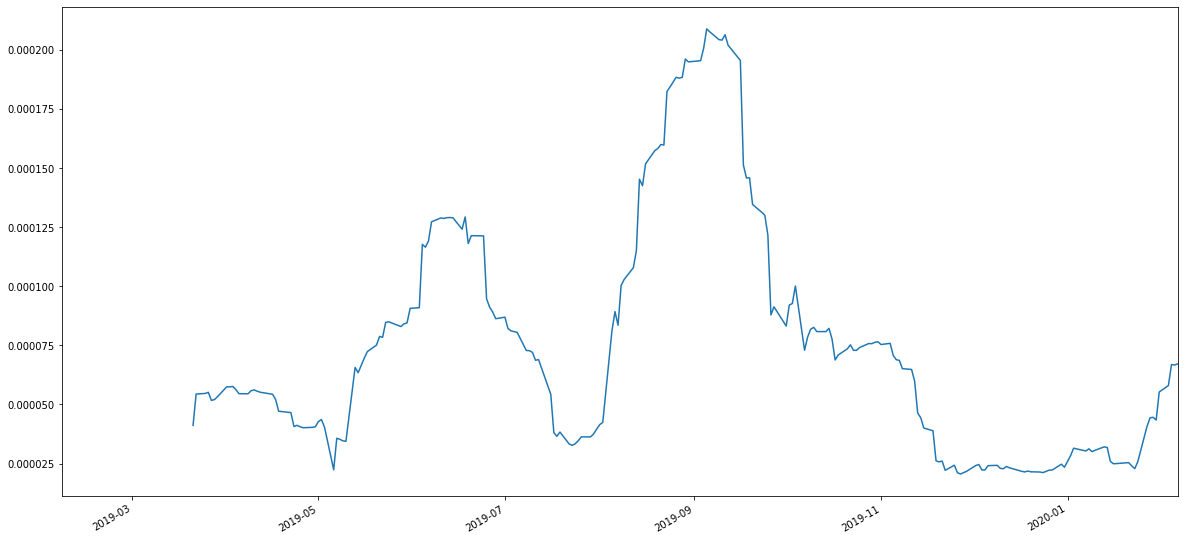

In [59]:
rolling_us_covariance = us_daily_returns['IGM (Technology)'].rolling(window=30).cov(us_daily_returns['SPY'])
rolling_us_covariance.plot(figsize=(20, 10))

# Sharpe Ratios for Portfolios

In [60]:
# Annualized Sharpe Ratios for China Portfolio
china_sharpe_ratios = (china_daily_returns.mean() * 252) / annualized_china_std
china_sharpe_ratios

ASHR                       0.634029
CQQQ (Technology)          0.930815
CHIE (Energy)             -0.785004
CHIM (Materials)          -0.023466
KURE (Healthcare)          1.192602
CHIS (Consumer Staples)    1.290367
dtype: float64

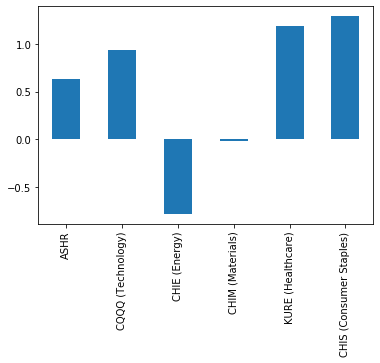

In [61]:
# Visualizing the Sharpe Ratio for China Portfolio
china_sharpe_ratios.plot.bar()

In [62]:
# Annualized Sharpe Ratios for US Portfolio
us_sharpe_ratios = (us_daily_returns.mean() * 252) / annualized_us_std
us_sharpe_ratios

SPY                        1.746413
IGM (Technology)           1.940256
IYE (Energy)              -0.876181
IYM (Materials)            0.479219
IYH (Healthcare)           1.118622
IECS (Consumer Staples)    1.791031
dtype: float64

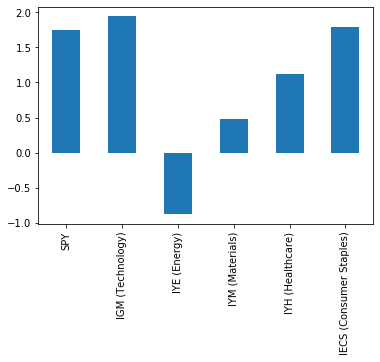

In [63]:
# Visualizing the Sharpe Ratio for US Portfolio
us_sharpe_ratios.plot.bar()